# Loading Packages

Justine Huynh （黄家琪）
November 12, 2020
二零二零年十一月十二日星期四

In [8]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF # random bagging and random sampling

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
# Bring all these things; pre-pocessing, tuning, etc
from sklearn.pipeline import Pipeline

# Manipulating, Pre-Processesing Data

In [10]:
trainData = pd.read_csv("../train_data.csv")
testData = pd.read_csv("../test_data.csv")

# Use descibe() method to see summary stats..
trainData.describe()

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,43590.000000,43589.000000,43588.000000,43589.000000,43589.000000,43579.000000,43586.000000,43586.000000,25007.000000,43590.000000,...,43589.000000,43589.000000,43589.000000,43589.000000,43589.000000,43588.000000,43589.000000,43590.000000,43590.000000,43590.000000
mean,52159.470452,2.203331,0.649697,6.853954,1.220675,7.424815,3.428073,1931.199422,2004.274683,1969.804313,...,4.297116,3.706348,13.467756,3.960839,6.302049,1.250551,0.639014,13.268640,3175.001078,12.927904
std,31134.869767,1.068895,0.608786,5.151037,0.624555,2.334643,1.163447,86.229606,17.783975,16.926513,...,1.373435,0.746981,4.045380,3.334032,2.098208,0.669050,0.905193,4.170675,3200.666743,0.865822
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,24534.250000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.000000,12.388394
50%,51708.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2008.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2212.000000,12.994530
75%,79542.750000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2013.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107154.000000,24.000000,11.000000,13.000000,6.000000,36.000000,54.000000,2018.000000,2019.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,39.000000,187301.000000,17.038378


In [12]:
testData.describe()

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14529.000000,14531.000000,14530.000000,8329.000000,14531.000000,...,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14530.000000,14531.000000,14531.000000,14531.000000
mean,51768.544629,2.206111,0.648889,6.828642,1.224279,7.443389,3.432661,1932.333035,2004.221635,1969.753905,...,4.305691,3.713509,13.386140,3.969858,6.282293,1.254009,0.647419,13.305829,3160.782121,12.928596
std,31289.344982,1.063170,0.602508,5.146761,0.626116,2.474703,1.301036,72.896276,12.540362,16.957134,...,1.378233,0.746653,3.996216,3.326620,2.079362,0.640858,0.923188,4.203454,2972.437611,0.859964
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1910.000000,1915.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.302585
25%,23853.500000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.500000,12.388394
50%,50861.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2007.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2229.000000,12.988832
75%,79493.000000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2012.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107127.000000,10.000000,5.000000,13.000000,5.000000,101.000000,53.000000,2018.000000,2018.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,6.000000,13.000000,24.000000,102340.000000,16.991908


In [14]:
testData.shape

(14531, 39)

In [15]:
trainData.shape

(43590, 39)

We are actually trying to predict the ln(Price), not the actual raw price.

So anyways, if 

$ln(Price) = 0$, 

then $Price = e^0 = 1$

In [17]:
# Drop all observations where the outcome is missing 
#dat = dat[~dat.PRICE.isna()]
trainData = trainData[~trainData.LN_PRICE.isna()]
testData = testData[~testData.LN_PRICE.isna()]
# Only houses that are sold
#dat = dat[dat.PRICE > 0]
#trainData = trainData[trainData.LN_PRICE]

<AxesSubplot:>

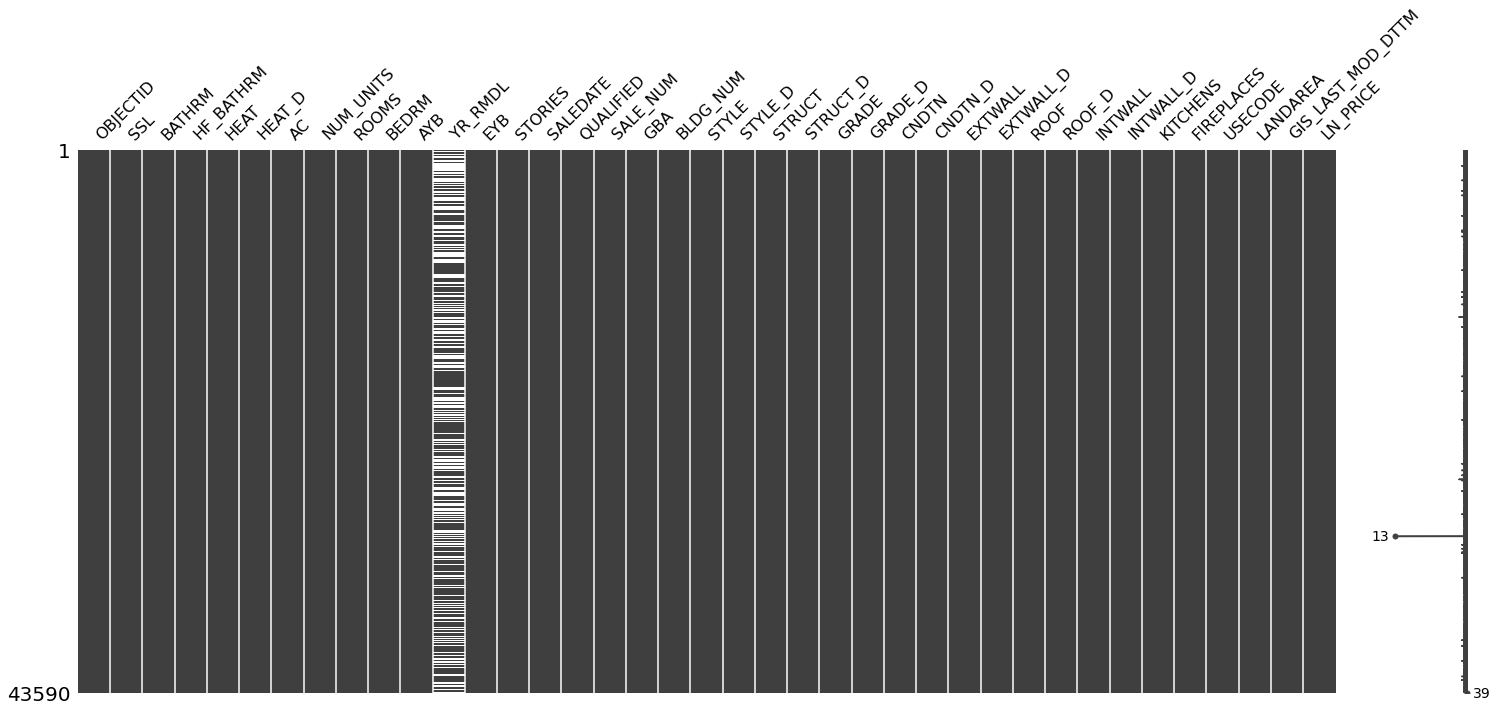

In [18]:
miss.matrix(trainData)

<AxesSubplot:>

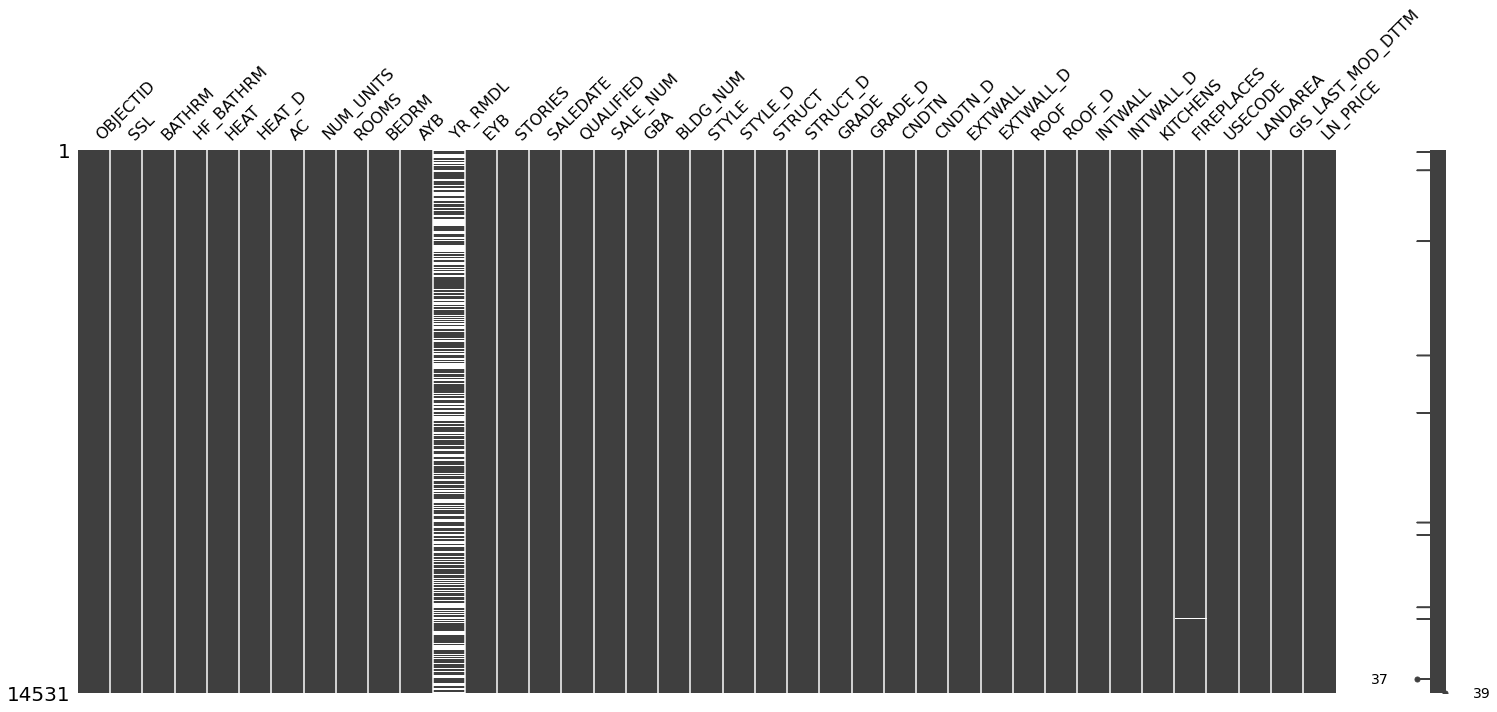

In [19]:
miss.matrix(testData)

So it looks like year_remodel is sparse.

In [42]:
#trainX = trainData[~]
# Let's grab 8 variables
trainX = trainData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
#testX = testData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
trainY = trainData[["LN_PRICE"]]
#trainX.drop(["OBJECTID", "YR_RMDL", "GRADE_D", "CNDTN_D", "EXTWALL_D"], axis=1)

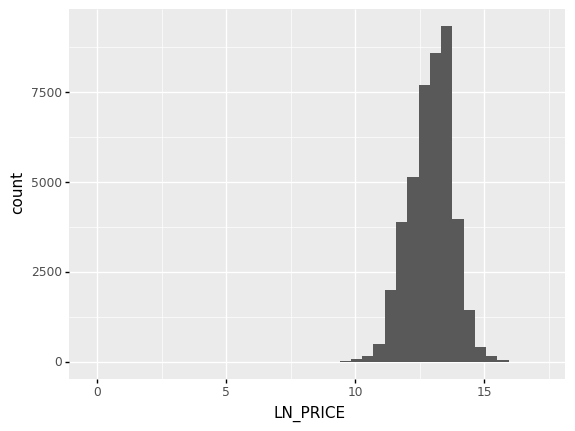

<ggplot: (132633653101)>

In [46]:
(
    trainData >>
    ggplot() +
    geom_histogram(aes(x = "LN_PRICE"), bins = 40)
)

In [49]:
# Let's standardize
# Let's 
scaler = pp.MinMaxScaler()
colNames = list(trainX)
trainX = scaler.fit_transform(trainX)
trainX # now it's scaled, in a numpy array

array([[0.125     , 0.09090909, 0.16666667, ..., 0.41666667, 0.83333333,
        0.01192733],
       [0.08333333, 0.09090909, 0.16666667, ..., 0.5       , 0.83333333,
        0.02055515],
       [0.08333333, 0.18181818, 0.16666667, ..., 0.5       , 0.5       ,
        0.04199657],
       ...,
       [0.08333333, 0.        , 0.16666667, ..., 0.33333333, 0.66666667,
        0.00743723],
       [0.125     , 0.09090909, 0.16666667, ..., 0.33333333, 0.66666667,
        0.00468764],
       [0.08333333, 0.09090909, 0.33333333, ..., 0.41666667, 0.66666667,
        0.00597968]])

In [51]:
# Convert back into data frame
trainX = pd.DataFrame(trainX, columns=colNames)
trainX

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,GRADE,CNDTN,LANDAREA
0,0.125000,0.090909,0.166667,0.250000,0.074074,0.416667,0.833333,0.011927
1,0.083333,0.090909,0.166667,0.194444,0.055556,0.500000,0.833333,0.020555
2,0.083333,0.181818,0.166667,0.250000,0.074074,0.500000,0.500000,0.041997
3,0.041667,0.090909,0.166667,0.166667,0.055556,0.250000,0.500000,0.014624
4,0.083333,0.000000,0.166667,0.305556,0.074074,0.416667,0.500000,0.011196
...,...,...,...,...,...,...,...,...
43585,0.041667,0.000000,0.166667,0.138889,0.037037,0.333333,0.500000,0.002990
43586,0.083333,0.090909,0.166667,0.194444,0.055556,0.416667,0.666667,0.007918
43587,0.083333,0.000000,0.166667,0.250000,0.074074,0.333333,0.666667,0.007437
43588,0.125000,0.090909,0.166667,0.166667,0.055556,0.333333,0.666667,0.004688


# Modeling

We are using continuous variables. Let's use K-folds cross-validation, for k = 5 folds. 

We will also use **mean squared error** for our performance results

In [ ]:
fold_generator = KFold(n_splits = 5, shuffle = True, random_state=111)
# Train on the exact same fold
# Kfold makes a generator object that we can use again and again.
# We want to use the same splits, except for the algorithm
use_metrics = ["neg_mean_squared_error"] # times it by -1

In [41]:
trainData.loc[:,["EXTWALL", "EXTWALL_D"]]
#trainData.loc[:, ["CNDTN", "CNDTN_D"]]
#trainData["EXTWALL"].describe()
trainData.columns

Index(['OBJECTID', 'SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',
       'SALEDATE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE',
       'STYLE_D', 'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D',
       'EXTWALL', 'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D',
       'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM',
       'LN_PRICE'],
      dtype='object')